In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd //content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
!ls "/content/drive/MyDrive"

'Chest Data Analysis'   data602      'fruit 360'
'Colab Notebooks'       Datathon_22  'h&m_recommendation_system'


In [4]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [5]:
sales_data = '/content/drive/Shared drives/DatathonDrive/1Million_Sales_cleaned.csv'
items_data = '/content/drive/Shared drives/DatathonDrive/1Million_Items_cleaned.csv'

In [6]:
# read sales data
df1 = pd.read_csv(sales_data)
df1.head()

,id,item_type,country_code,country_of_sale,amount_paid_fmt,item_price,item_description,amount_paid,artist_name,currency,album_title,amount_paid_usd,amount_over_fmt,Sales_Date
0,girlbanddublin.bandcamp.com/album/live-at-vica...,a,gb,United Kingdom,$9.99,9.99,Live at Vicar Street,9.99,Girl Band,USD,NaN,9.99,NaN,2020-09-09
1,maharettarecords.bandcamp.com/album/neurogen,a,fi,Finland,£1,1.00,Neurogen,1.00,Jirah,GBP,NaN,1.30,NaN,2020-09-09
2,maharettarecords.bandcamp.com/album/the-last-s...,a,fi,Finland,£3,3.00,The Last Snare Bender,3.00,D-Ther,GBP,NaN,3.90,NaN,2020-09-09
3,alicesitski.bandcamp.com/album/white-noise-tv,p,gb,United Kingdom,€10.50,10.50,Limited Edition Compact Disc,10.50,WHITE NOISE TV,EUR,WHITE NOISE TV,12.39,NaN,2020-09-09
4,linguaignota.bandcamp.com/track/o-ruthless-gre...,t,us,United States,$1,1.00,O Ruthless Great Divine Director,1.00,LINGUA IGNOTA,USD,NaN,1.00,NaN,2020-09-09


In [7]:
# read items data
df2 = pd.read_csv(items_data)
df2.head()

,id,name,dateModified,keywords,@type,datePublished
0,1985-music.bandcamp.com/album/about-you-ep,About You EP,13 Aug 2020 23:13:13 GMT,"drum and bass, London",MusicAlbum,04 Aug 2020 15:21:20 GMT
1,r-labelgroup.bandcamp.com/track/like-soldiers,Like Soldiers,21 May 2020 12:07:08 GMT,Berlin,"['MusicRecording', 'Product']",24 Apr 2020 11:22:26 GMT
2,adesxshades.bandcamp.com/album/sample-pack-one,Sample Pack One,07 Aug 2020 07:00:19 GMT,"Electronic, Experimental, Hip Hop, bass, bass ...",MusicAlbum,07 Aug 2020 07:00:19 GMT
3,rogressive-future.bandcamp.com/track/virus-on-...,Virus on street,30 Jul 2020 13:44:35 GMT,"Electronic, IDM, electro, techno, Kiev","['MusicRecording', 'Product']",23 Jul 2020 18:17:02 GMT
4,knightwerk.bandcamp.com/album/ultimecia-tools,Ultimecia Tools,15 Sep 2020 17:06:03 GMT,"Dance, EDM, Electronic, House, Jersey Club, Mi...",MusicAlbum,23 Apr 2020 16:37:39 GMT


In [8]:
# join two data
df = df1.join(df2.set_index('id'), on='id')
df.head()

,id,item_type,country_code,country_of_sale,amount_paid_fmt,item_price,item_description,amount_paid,artist_name,currency,album_title,amount_paid_usd,amount_over_fmt,Sales_Date,name,dateModified,keywords,@type,datePublished
0,girlbanddublin.bandcamp.com/album/live-at-vica...,a,gb,United Kingdom,$9.99,9.99,Live at Vicar Street,9.99,Girl Band,USD,NaN,9.99,NaN,2020-09-09,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland",MusicAlbum,02 Sep 2020 13:45:09 GMT
1,maharettarecords.bandcamp.com/album/neurogen,a,fi,Finland,£1,1.00,Neurogen,1.00,Jirah,GBP,NaN,1.30,NaN,2020-09-09,Neurogen,28 Mar 2020 15:10:47 GMT,"Electronic, Psychedelic Trance, psytrance, London",MusicAlbum,28 Mar 2020 15:10:13 GMT
2,maharettarecords.bandcamp.com/album/the-last-s...,a,fi,Finland,£3,3.00,The Last Snare Bender,3.00,D-Ther,GBP,NaN,3.90,NaN,2020-09-09,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,"Electronic, Psychedelic Trance, psytrance, London",MusicAlbum,21 Aug 2020 08:55:39 GMT
3,alicesitski.bandcamp.com/album/white-noise-tv,p,gb,United Kingdom,€10.50,10.50,Limited Edition Compact Disc,10.50,WHITE NOISE TV,EUR,WHITE NOISE TV,12.39,NaN,2020-09-09,WHITE NOISE TV,22 Nov 2020 23:06:45 GMT,"Darkpop, EBM, Electro, Electronic, Synthpop, f...",MusicAlbum,30 Mar 2020 19:28:39 GMT
4,linguaignota.bandcamp.com/track/o-ruthless-gre...,t,us,United States,$1,1.00,O Ruthless Great Divine Director,1.00,LINGUA IGNOTA,USD,NaN,1.00,NaN,2020-09-09,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States","['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  object 
 1   item_type         1000000 non-null  object 
 2   country_code      1000000 non-null  object 
 3   country_of_sale   1000000 non-null  object 
 4   amount_paid_fmt   1000000 non-null  object 
 5   item_price        1000000 non-null  float64
 6   item_description  999994 non-null   object 
 7   amount_paid       1000000 non-null  float64
 8   artist_name       999998 non-null   object 
 9   currency          1000000 non-null  object 
 10  album_title       356468 non-null   object 
 11  amount_paid_usd   1000000 non-null  float64
 12  amount_over_fmt   119133 non-null   object 
 13  Sales_Date        1000000 non-null  object 
 14  name              604268 non-null   object 
 15  dateModified      604271 non-null   object 
 16  k

In [10]:
df.describe()

,item_price,amount_paid,amount_paid_usd
count,1000000.000000,1000000.000000,1000000.000000
mean,15.475516,17.899412,8.931315
std,121.719962,143.261461,12.490078
min,0.000000,0.200000,0.200000
25%,1.000000,2.000000,2.000000
50%,5.000000,5.600000,6.000000
75%,10.000000,10.000000,11.630000
max,29760.000000,50000.000000,1286.260000


In [11]:
# we only consider the amount_paid_usd column since it has the currency transformed already
# drop other price related column
df = df.drop(['amount_paid_fmt','item_price','amount_paid','currency'], axis = 1)

In [12]:
# find the top 5 countries in sales data
cos = df.groupby(by=['country_code']).sum().sort_values(by=['amount_paid_usd'],ascending=False)
#cos.to_csv('/content/drive/Shared drives/DatathonDrive/cos.csv')
cos.reset_index(inplace=True)
cos = cos.rename(columns = {'index':'country_code'})[:5]
cos

,country_code,amount_paid_usd
0,us,3947551.68
1,gb,1294008.01
2,de,698963.12
3,au,486608.00
4,ca,359408.95


The countries with country code us, gb, de, au, and ca, have the largest sale in Bandcamp.

In [13]:
# we only select the sales data from top 5 sales countries
c_codes = ['us', 'gb','de','au','ca']
top5c = df[df['country_code'].isin(c_codes)]

# we conclude sales that are not from these countries
other_df = df.loc[df.index.difference(top5c.index)]
other_sale = other_df['amount_paid_usd'].sum()
cos = cos.append({'country_code' : 'other' , 'amount_paid_usd' : other_sale} , ignore_index=True)
#cos.to_csv('/content/drive/Shared drives/DatathonDrive/cos.csv')
cos

,country_code,amount_paid_usd
0,us,3947551.68
1,gb,1294008.01
2,de,698963.12
3,au,486608.00
4,ca,359408.95
5,other,2144775.44


In [14]:
top5c.head()

,id,item_type,country_code,country_of_sale,item_description,artist_name,album_title,amount_paid_usd,amount_over_fmt,Sales_Date,name,dateModified,keywords,@type,datePublished
0,girlbanddublin.bandcamp.com/album/live-at-vica...,a,gb,United Kingdom,Live at Vicar Street,Girl Band,NaN,9.99,NaN,2020-09-09,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland",MusicAlbum,02 Sep 2020 13:45:09 GMT
3,alicesitski.bandcamp.com/album/white-noise-tv,p,gb,United Kingdom,Limited Edition Compact Disc,WHITE NOISE TV,WHITE NOISE TV,12.39,NaN,2020-09-09,WHITE NOISE TV,22 Nov 2020 23:06:45 GMT,"Darkpop, EBM, Electro, Electronic, Synthpop, f...",MusicAlbum,30 Mar 2020 19:28:39 GMT
4,linguaignota.bandcamp.com/track/o-ruthless-gre...,t,us,United States,O Ruthless Great Divine Director,LINGUA IGNOTA,NaN,1.00,NaN,2020-09-09,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States","['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT
5,sofiefatouretchi.bandcamp.com/track/try-to-rea...,t,us,United States,Try to Reach Me,Sofie,Cult Survivor,1.29,NaN,2020-09-09,NaN,NaN,NaN,NaN,NaN
7,haroldbudd.bandcamp.com/album/the-white-arcades,a,de,Germany,The White Arcades,Harold Budd,NaN,6.50,NaN,2020-09-09,NaN,NaN,NaN,NaN,NaN


In [15]:
top5c['item_description'].value_counts()[:10]

Limited Edition Cassette                                            4836
Good Music to Avert the Collapse of American Democracy, Volume 2    3213
CD                                                                  2865
Limited Edition Compact Disc                                        2193
Limited Edition 12" Vinyl                                           2153
Compact Disc                                                        2011
12" Vinyl                                                           1762
Cassette                                                            1705
Shore                                                               1608
Vinyl LP                                                            1202
Name: item_description, dtype: int64

In [16]:
# the type of object that was sold, a = digital album, p = Physical Items, t = digital tracks
type_count = top5c['item_type'].value_counts()
type_df = top5c.groupby(by=top5c['item_type']).sum().sort_values(by=['amount_paid_usd'],ascending=False)
type_df['count']= type_count
#type_df.to_csv('/content/drive/Shared drives/DatathonDrive/type_df.csv')
type_df

,amount_paid_usd,count
item_type,,
p,3530860.65,181562
a,2650095.47,363711
t,408398.36,178960
b,197185.28,8691


Physical items occupy the largest proportion of sales figure, and digital albums are the second.
However, digital items have a larger sales volumn than physical items.
This may due to the fact that physical items are more expensive than digital albums.

In [17]:
# zoom in to the physical item category and see which items sale the best
p_df = top5c.loc[top5c['item_type']=='p']
p_df['item_description'].value_counts()

Limited Edition Cassette                    4836
CD                                          2864
Limited Edition Compact Disc                2193
Limited Edition 12" Vinyl                   2153
Compact Disc                                2011
                                            ... 
limited digipak release                        1
2x12" Black Vinyl                              1
The Devil's Carnival [LTD RED 12' Vinyl]       1
Late Parade Limited Edition Compact Disc       1
Bewitcher Logo Patch                           1
Name: item_description, Length: 39187, dtype: int64

Cassette, CD, Disc, and Vinyl are the most popular items in physical items.

In [18]:
# zoom in to the digital albums category and see which items sale the best
a_df = top5c.loc[top5c['item_type']=='a']
a_df['item_description'].value_counts()

Good Music to Avert the Collapse of American Democracy, Volume 2    3213
Shore                                                               1606
UNTITLED (Rise)                                                     1023
Ska Against Racism                                                   883
2020 DUMP                                                            868
                                                                    ... 
SHÖCK                                                                  1
Sparked EP                                                             1
Little Brother Is Watching (Instrumental mixes)                        1
Chapel                                                                 1
FLMs 9                                                                 1
Name: item_description, Length: 130679, dtype: int64

The most popular album is "Good Music to Avert the Collapse of American Democracy, Volumn 2".

In [19]:
# let's take a look at the top 5 artist in sales
top5c['artist_name'].value_counts()

Various Artists                                                        6986
Barbara Marciniak                                                      4058
SAULT                                                                  3752
Various Artists Working to Avert the Collapse of American Democracy    3213
King Gizzard & The Lizard Wizard                                       2547
                                                                       ... 
Yaul                                                                      1
Bayonne                                                                   1
Lars Finberg                                                              1
The Coffis Brothers                                                       1
Telelectrix                                                               1
Name: artist_name, Length: 129762, dtype: int64

The top 5 artist with the largest sales volumn is "Various Artists", "Barbara Marciniak", "SAULT", "Various Artists Working to Avert the Collapse of American Democracy", and " King Gizzard & The Lizard Wizard".
We can also find out that there are various artists that only have one sales.

In [21]:
# sort the data set by artist and see the sales figure in these artists
artist_sale_df = top5c.groupby(by=top5c['artist_name']).sum().sort_values(by=['amount_paid_usd'],ascending=False)[:10]
# artist_sale_df.to_csv('/content/drive/Shared drives/DatathonDrive/artist_sale_df.csv')
artist_sale_df.head()

,amount_paid_usd
artist_name,
SAULT,73305.59
Various Artists Working to Avert the Collapse of American Democracy,70064.05
Various Artists,65778.51
King Gizzard & The Lizard Wizard,56310.81
Shpongle,38448.40


In [22]:
top5c['@type'].value_counts()

MusicAlbum                       315434
['MusicRecording', 'Product']    122516
Name: @type, dtype: int64

In [23]:
top5c.groupby(by=top5c['@type']).sum().sort_values(by=['amount_paid_usd'],ascending=False)

,amount_paid_usd
@type,
MusicAlbum,3249457.98
"['MusicRecording', 'Product']",283038.70


In [25]:
# top 10 sales volumn items
top5c['id'].value_counts()[:10]

goodmusic2020.bandcamp.com/album/good-music-to-avert-the-collapse-of-american-democracy-volume-2    3213
saultglobal.bandcamp.com/album/untitled-rise                                                        2286
fleetfoxes.bandcamp.com/album/shore                                                                 1606
boldconnectionsunlimited.bandcamp.com/track/a-confluence-of-chaos                                   1081
boldconnectionsunlimited.bandcamp.com/track/moon-musings-162                                        1060
boldconnectionsunlimited.bandcamp.com/track/the-big-debate-part-1                                   1012
https://music.sufjan.com/album/the-ascension                                                         894
badtimerecords.bandcamp.com/album/ska-against-racism                                                 882
daupe.bandcamp.com/album/flygod-is-an-awesome-god-cover-2                                            871
jeffrosenstock.bandcamp.com/album/2020-dump            

In [26]:
# top 10 sales figure items
top5c.groupby(by=top5c['id']).sum().sort_values(by=['amount_paid_usd'],ascending=False)[:10]

,amount_paid_usd
id,
goodmusic2020.bandcamp.com/album/good-music-to-avert-the-collapse-of-american-democracy-volume-2,70064.05
saultglobal.bandcamp.com/album/untitled-rise,47811.99
shponglemusic.bandcamp.com/album/ineffable-mysteries-from-shpongleland-remastered,34969.16
daupe.bandcamp.com/album/flygod-is-an-awesome-god-cover-2,27125.15
kinggizzard.bandcamp.com/merch/demos-vol-1-vol-2-t-shirt,25286.03
mandolinorange.bandcamp.com/album/austin-city-limits-live-at-the-moody-theater-3,16017.50
saultglobal.bandcamp.com/album/untitled-black-is,15088.54
fleetfoxes.bandcamp.com/album/shore,13966.58
kinggizzard.bandcamp.com/merch/live-in-asheville-19-t-shirt-black,13290.08


In [27]:
# define a function to separate and count keywords
def count_keywords(df):
  kw = df.dropna(subset=['keywords'])
  kw_lst = list(kw['keywords'].values)
  kw_com=[]
  for n in range(len(kw_lst)):
    k = kw_lst[n].split(', ')
    kw_com += k
  kw_count = pd.value_counts(np.array(kw_com))
  return kw_count

In [28]:
# count the top 10 keywords in the top 5 sales countries
kw_count_df = pd.DataFrame()
for c in c_codes:
  df = top5c.loc[top5c['country_code']==c]
  kw_c = pd.DataFrame(count_keywords(df),columns=['count'])[:10]
  kw_c['country_code']=c
  kw_count_df = kw_count_df.append(kw_c)
kw_count_df.reset_index(inplace=True)
kw_count_df = kw_count_df.rename(columns = {'index':'genre'})
#kw_top5.to_csv('/content/drive/Shared drives/DatathonDrive/kw_top5.csv')
kw_count_df.head()

,genre,count,country_code
0,Electronic,65594,us
1,Alternative,28309,us
2,Rock,27223,us
3,Metal,26516,us
4,Experimental,21676,us


In [29]:
# define a function to collect the keywords and their sales figure
from collections import defaultdict
def find_kw_sale(df, country):
  kw_dict = defaultdict(float)
  c_df = df.loc[df['country_code']==country]
  c_df = c_df.dropna(subset=['keywords'])
  keywords_lst = list(c_df['keywords'])
  amount_paid_usd_lst = list(c_df['amount_paid_usd'])
  for i in range(len(c_df)):
    lst = keywords_lst[i].split(', ')
    paid = amount_paid_usd_lst[i]
    for word in lst:
      kw_dict[word] += paid
  return kw_dict

In [30]:
# sales figure of the top 10 keywords in the top 5 sales countries
kw_sale_df = pd.DataFrame()
for c in c_codes:
  c_sale = find_kw_sale(top5c, c)
  c_sales = sorted(c_sale.items(), key=lambda item: item[1], reverse=True)[0:10]
  c_df = pd.DataFrame(c_sales,columns=['keyword', 'sales'])
  c_df.insert(2, 'country_code', c, allow_duplicates=True)
  kw_sale_df = kw_sale_df.append(c_df)
#kw_sale_df.to_csv('/content/drive/Shared drives/DatathonDrive/kw_sale_df.csv')  

In [31]:
kw_sale_df.head()

,keyword,sales,country_code
0,Electronic,454297.42,us
1,Rock,282795.56,us
2,Alternative,270068.37,us
3,Metal,241009.63,us
4,Experimental,192076.11,us


In [33]:
# transform the "Sales_Date" column to datatime format
top5c['Sales_Date']= pd.to_datetime(top5c['Sales_Date'])
top5c.head()

,id,item_type,country_code,country_of_sale,item_description,artist_name,album_title,amount_paid_usd,amount_over_fmt,Sales_Date,name,dateModified,keywords,@type,datePublished
0,girlbanddublin.bandcamp.com/album/live-at-vica...,a,gb,United Kingdom,Live at Vicar Street,Girl Band,NaN,9.99,NaN,2020-09-09,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland",MusicAlbum,02 Sep 2020 13:45:09 GMT
3,alicesitski.bandcamp.com/album/white-noise-tv,p,gb,United Kingdom,Limited Edition Compact Disc,WHITE NOISE TV,WHITE NOISE TV,12.39,NaN,2020-09-09,WHITE NOISE TV,22 Nov 2020 23:06:45 GMT,"Darkpop, EBM, Electro, Electronic, Synthpop, f...",MusicAlbum,30 Mar 2020 19:28:39 GMT
4,linguaignota.bandcamp.com/track/o-ruthless-gre...,t,us,United States,O Ruthless Great Divine Director,LINGUA IGNOTA,NaN,1.00,NaN,2020-09-09,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States","['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT
5,sofiefatouretchi.bandcamp.com/track/try-to-rea...,t,us,United States,Try to Reach Me,Sofie,Cult Survivor,1.29,NaN,2020-09-09,NaN,NaN,NaN,NaN,NaN
7,haroldbudd.bandcamp.com/album/the-white-arcades,a,de,Germany,The White Arcades,Harold Budd,NaN,6.50,NaN,2020-09-09,NaN,NaN,NaN,NaN,NaN


In [107]:
# sales figure group by sales date
date_reg = top5c[['country_code','amount_paid_usd','Sales_Date']]
date_reg = date_reg.groupby(by=['Sales_Date']).sum()
date_reg['Time'] = np.arange(len(date_reg.index))
date_reg.head()

,amount_paid_usd,Time
Sales_Date,,
2020-09-09,28536.04,0
2020-09-10,260209.44,1
2020-09-11,318974.25,2
2020-09-12,268833.82,3
2020-09-13,198491.18,4


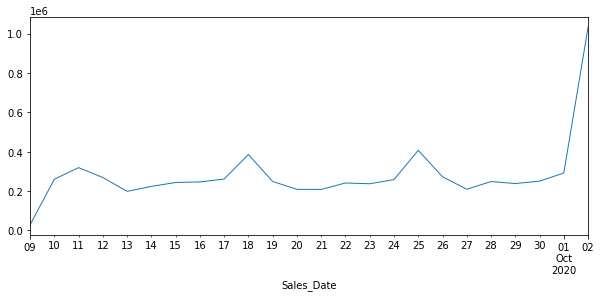

In [108]:
fig = plt.figure(figsize=(10,4))
date_reg['amount_paid_usd'].plot(linewidth=1)

*   There is a peak on every Friday, so I assume there is a sale on every Friday. 
*   On Oct 2nd, 2020, there was large peak because of Bandcamp Friday, which Bandcamp waived all the revenue share from the artists to support them!




In [115]:
# Time Series Regression
# To perform a time series regression, we need to first remove the outlier, which is Oct 1st, 2020.
date_reg = date_reg.drop(index=('2020-10-02'))

In [117]:
# Training data
X = date_reg.loc[:, ['Time']]  # features
y = date_reg.loc[:, 'amount_paid_usd']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

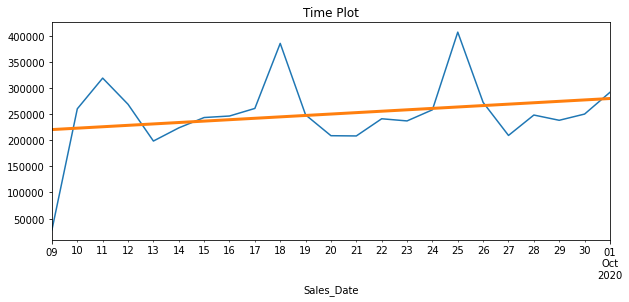

In [118]:
fig = plt.figure(figsize=(10,4))
ax = y.plot()#**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot');

In [121]:
#Moving average of window size 5
mov_avg_data = top5c[['country_code','amount_paid_usd','Sales_Date']]
mov_avg_data = mov_avg_data.groupby(by=['Sales_Date']).sum()
mov_avg_data = mov_avg_data.drop(index=('2020-10-02'))
mov_avg_data.head()

,amount_paid_usd
Sales_Date,
2020-09-09,28536.04
2020-09-10,260209.44
2020-09-11,318974.25
2020-09-12,268833.82
2020-09-13,198491.18


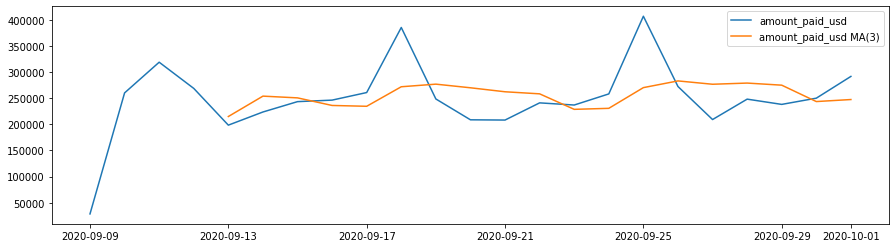

In [122]:
fig = plt.figure(figsize=(15,4))
mov_avg_data['moving_avg_forecast'] = mov_avg_data['amount_paid_usd'].rolling(5).mean()
plt.plot(mov_avg_data['amount_paid_usd'], label='amount_paid_usd')
plt.plot(mov_avg_data['moving_avg_forecast'], label='amount_paid_usd MA(3)')
plt.legend(loc='best')
plt.show()